# Experimento 2: Anillo de Kac

El anillo de Kac es un excelente modelo de un sistema dinámico que ilustra aspectos como el tiempo de recurrencia de Poincaré, las hipótesis estadísticas y, en general, cómo un sistema que es reversible puede mostrar comportamiento irreversible. Fue propuesto por Marc Kac en conexión con la ecuación de Boltzmann.

El modelo consta de un anillo en el que hay $N$ casillas, ocupadas cada una de ellas por una bola de color azul o rojo (normalmente $N \gg 1$). Sobre el anillo se disponen $M$ sitios al azar (con $M\leq N$). La dinámica es muy sencilla: de forma síncrona, a cada unidad de tiempo, las bolas saltan a la casilla contígua en el sentido de las agujas del reloj. Si una bola cruza uno de los $M$ sitios elegidos, cambia su color.

La cuestión que nos interesa es: ¿Cuántas bolas de cada color hay tras $t$ pasos de tiempo?

La dinámica de este modelo es reversible y periódica de periodo (al menos) $T=2N$, porque tras $T$ pasos de tiempo cada partícula ha dado dos vueltas al anillo, ha cruzado por $2M$ sitios marcados y ha sufrido $2M$ cambios de color, que por ser un número par implica que ha recuperado su color inicial. Por tanto, el tiempo de recurrencia de Poincaré es $2N$.

Vamos a escribir unas ecuaciones del movimiento para este sistema. Para ello, denotamos por $N_A (t)$ y $N_R (t)$ el número total de bolas azules y rojas en el tiempo $t$ respectivamente. Asimismo, definimos $n_A (t)$ y $n_R (t)$ como el número total de bolas azules y rojas que tienen delante un sitio marcado y que, por tanto, van a cambiar de color. Con estas definiciones, es fácil ver que las ecuaciones de evolución se pueden escribir como:

(1)
$$
N_A (t+1) = N_A(t) - n_A (t) + n_R (t)
$$

$$
N_R (t+1) = N_R(t) - n_R (t) + n_A (t)
$$

Estas ecuaciones no se pueden resolver de manera general. Sin embargo, podemos hacer una hipótesis muy sencilla, que supone que la probabilidad de que una partícula encuentre un sitio marcado es el número total de sitios dividido por el número de casillas:

(2)
$$
\frac{n_A(t)}{N_A(t)} = \frac{n_R(t)}{N_R(t)} = \frac{N}{M}
$$

Con esta hipótesis podemos resolver las ecuaciones (1), sin más que restarlas entre sí e introduciendo (2) para eliminar $n_A(t)$ y $n_R(t)$:

$$
\begin{aligned}
N_{A}(t)-N_{R}(t) &=\left(1-2 \frac{M}{N}\right)\left[N_{A}(t-1)-N_{R}(t-1)\right] \\
&=\left(1-2 \frac{M}{N}\right)^{t}\left[N_{A}(0)-N_{R}(0)\right]
\end{aligned}
$$

El análisis de esta solución nos dice que la diferencia entre el número de bolas azules y rojas tiende a 0 *siempre*, y, por tanto, el sistema no es periódico ni reversible, en clara contradicción con el modelo de partida.

La discrepancia proviene de la hipótesis probabilística realizada en (2). Esta hipótesis, que hemos supuesto *válida para todo tiempo* elimina las correlaciones que se crean en el sistema. En el lenguaje de la ecuación de Boltzmann, la hipótesis (2) es equivalente a la hipótesis del Caos Molecular o *Stosszahlansatz*.

El applet Java implementa el anillo de Kac. En en panel de la izquierda se visualiza el anillo, con los sitios marcados representados por una línea verde. El anillo exterior mantiene la condición inicial, mientras que el interior muestra la evolución temporal. El panel de la derecha dibuja la diferencia entre el número de bolas azules y el de bolas rojas en función del tiempo. Se puede elegir el número total de bolas, el número de sitios marcados o sectores, así como la disposición de los colores de las bolas entre aleatorios, aleatorios con una distribución de 70% azules y 30% rojas, todos azules o bien de manera alternada.

En el caso de condiciones iniciales con 70/30 o todos azules se dibuja una línea azul que es la solución (3), que, como se observa, es válida únicamente a tiempos muy cortos. Con ello se comprueba que la hipótesis (2) no es válida a todo tiempo, sino únicamente a tiempos cortos. La dinámica de las partículas crea correlaciones que invalidan dicha hipótesis.


<video controls src="../Copias_Web/Videos/02-kac.mp4"/>

# Pseudocódigo

1. Generar N casillas
2. Disponer M sitios al azar
3. Establecer cc periodicas
4. Establecer ley de cambio de casilla al pasar por un sitio
5. Mover casillas

El código sería algo así:

```python
if (INICIA = True):
    Genera_Anillo
    
    
def Genera_Anillo(N_p, N_sec, Condiciones):
    for i in range(1, N_p):
        X[i] = random_boolean(Condiciones)
    for i in range(1, N_sec):
        S[i] = random(1, N_p)
        # comprobar que no se repitan sitios, si se repite uno, volver a generarlo
    return Anillo

def Anillo_Step(anillo, t):
    for i in range(1, N_p):
        if i == S[j]:
    return Anillo

def Plot_Anillos(anillo_interior, anillo_exterior):
    return plot

def plot 
    
```

# Código

In [1]:
%matplotlib inline

In [2]:
# Imports
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style


In [3]:
# Definamos funciones
def Genera_Anillo(N, M, condicion = "random"):
    X = []
    S = (random.sample(range(1,N), M))
    for i in range(0, N):
        X.append(bool(random.getrandbits(1)))
        # comprobar que no se repitan sitios, si se repite uno, volver a generarlo
    return X, S

def Anillo_Step(X, S):
    X_s = []
    for i in range(0, len(X)):
        if i in S:
            X_s.append(not X[i-1])
        else:
            X_s.append(X[i-1])
    return X_s

In [4]:
# Probemoslo
N = 50
M = 5

X, S = Genera_Anillo(N, M)

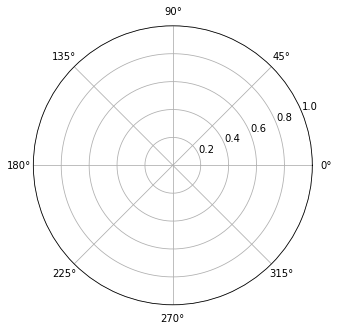

In [5]:
# Probemos a plotearlo
fig = plt.figure(figsize=(5,10))
ax = plt.subplot(111, projection = 'polar')

def Plot_Anillo(X, X_t, S):
    #fig = plt.figure(figsize=(5,10))
    #ax = plt.subplot(111, projection = 'polar')

    r = 1
    theta = 2 * np.pi / len(X)

    ax.set_theta_zero_location('N')
    ax.set_yticklabels([])
    ax.set_xticks(np.arange(0, 2*np.pi, theta))
    ax.set_xticklabels(range(1,N+1))

    for i in range(0, len(X)):
        if X[i] == True:
            plt.polar(theta*i, 1, 'bo')
        elif X[i] == False:
            plt.polar(theta*i, 1, 'ro')
        
        if X_t[i] == True:
            plt.polar(theta*i, 0.8, 'bo')
        elif X_t[i] == False:
            plt.polar(theta*i, 0.8, 'ro')

    for i in range(0, len(S)):
        plt.polar(theta*S[i] - theta / 2, 0.9, 'go')
    plt.show()

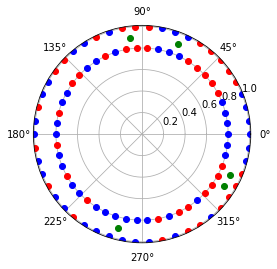

In [6]:
Plot_Anillo(X, X, S)

In [7]:
X_1 = Anillo_Step(X, S)

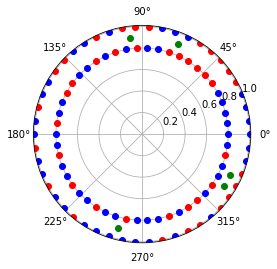

In [8]:
Plot_Anillo(X, X_1, S)

## Veamos como animarlo
[Aquí](https://brushingupscience.com/2016/06/21/matplotlib-animations-the-easy-way/) y [aquí](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/)

In [9]:
%matplotlib notebook

In [10]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

<IPython.core.display.Javascript object>


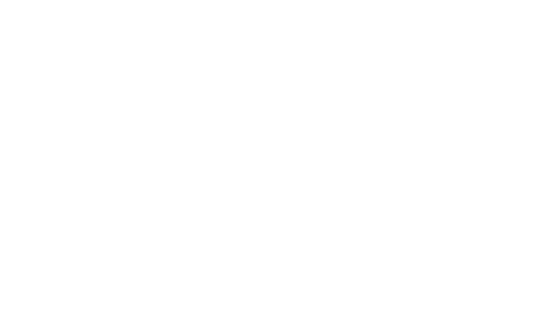

<IPython.core.display.Javascript object>


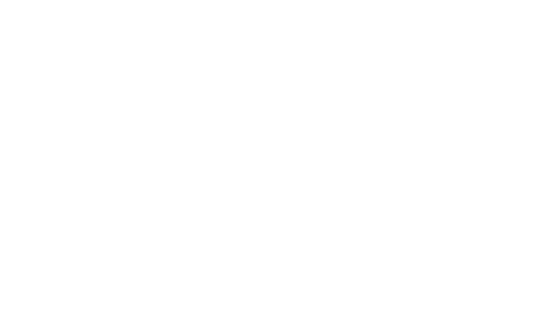

Traceback (most recent call last):
  File "C:\Anaconda\envs\tfg-fises\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Anaconda\envs\tfg-fises\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [11]:
fig_anim, ax_anim = plt.subplots(figsize = (5, 3)) # Con esta linea salen dos plots, sin ella, el primer frame se queda en toda la animacion
ax_anim.set(xlim = (-3, 3), ylim = (-1, 1))

x = np.linspace(-3, 3, 91)
t = np.linspace(1, 25, 30)
X2, T2 = np.meshgrid(x, t)

sinT2 = np.sin(2 *np.pi * T2 / T2.max())
F = 0.9 * sinT2 * np.sinc(X2 * (1 + sinT2))

line = ax_anim.plot(x, F[0, :], color = 'k', lw = 2)[0]

def animate(i):
    line.set_ydata(F[i, :])
    
anim = FuncAnimation(fig_anim, animate, interval=100, frames=len(t)-1)

HTML(anim.to_html5_video())

In [12]:
def Anim_Anillo(X, S):
    Anim = [X]
    for i in range(0, 2 * len(X)-1):
        Anim.append(Anillo_Step(Anim[i], S))
    return Anim

In [13]:
anim = Anim_Anillo(X, S)

In [14]:
len(anim)

100

<IPython.core.display.Javascript object>


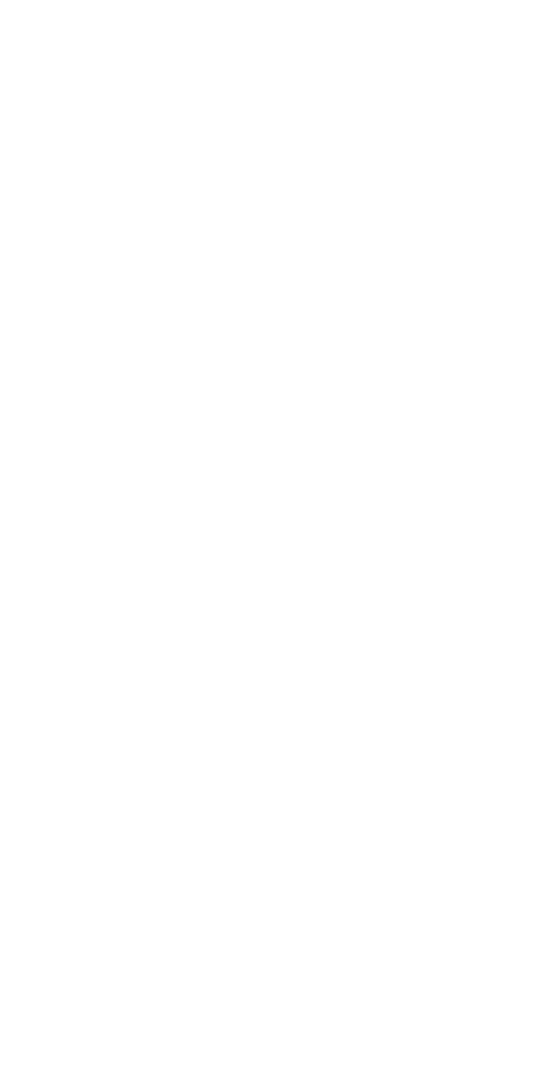

<IPython.core.display.Javascript object>


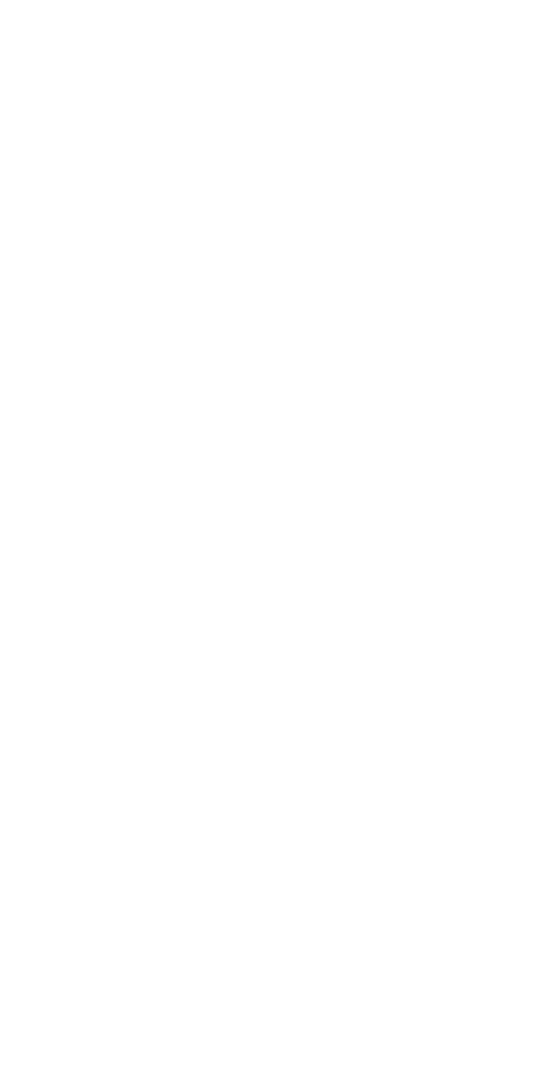

In [15]:
fig = plt.figure(figsize=(5,10))
ax = plt.subplot(111, projection = 'polar')

def animate(i):
    Plot_Anillo(X, anim[i], S)
    
animation = FuncAnimation(fig_anim, animate, interval = 100, frames = 2*len(X))

HTML(animation.to_html5_video())